In [22]:
import numpy as np 
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('arrested.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129374 entries, 0 to 129373
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   _id                129374 non-null  int64 
 1   ARREST_YEAR        129374 non-null  int64 
 2   DIVISION           129374 non-null  object
 3   HOOD_158           129374 non-null  object
 4   NEIGHBOURHOOD_158  129374 non-null  object
 5   SEX                129374 non-null  object
 6   AGE_COHORT         129374 non-null  object
 7   AGE_GROUP          129374 non-null  object
 8   CATEGORY           129374 non-null  object
 9   SUBTYPE            129374 non-null  object
 10  ARREST_COUNT       129374 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 10.9+ MB


In [25]:
df = df.rename(columns=str.lower)

In [26]:
df.isna().sum()

_id                  0
arrest_year          0
division             0
hood_158             0
neighbourhood_158    0
sex                  0
age_cohort           0
age_group            0
category             0
subtype              0
arrest_count         0
dtype: int64

In [27]:
print(f'Shape of the dataset: {df.shape}')

Shape of the dataset: (129374, 11)


In [28]:
text_columns = df.select_dtypes(include='object').columns
text_columns

Index(['division', 'hood_158', 'neighbourhood_158', 'sex', 'age_cohort',
       'age_group', 'category', 'subtype'],
      dtype='object')

In [29]:
df['arrest_year'].unique()

array([2019, 2022, 2018, 2015, 2014, 2020, 2021, 2016, 2017], dtype=int64)

In [30]:
for column in text_columns:
    print(df[column].unique())

['D14' 'D12' 'D22' 'D52' 'D43' 'D31' 'D33' 'D55' 'D32' 'D41' 'D11' 'D42'
 'NSA' 'D51' 'D53' 'D13' 'D23']
['83' '30' '165' '18' '78' '164' '143' '133' '22' '166' '43' '66' '27'
 '119' '111' '138' '44' '162' '12' '128' '61' '84' '130' 'NSA' '112' '73'
 '11' '148' '99' '69' '134' '158' '135' '125' '168' '96' '25' '120' '113'
 '90' '145' '161' '81' '63' '68' '56' '54' '122' '40' '42' '85' '60' '20'
 '107' '33' '67' '123' '171' '146' '163' '170' '53' '149' '79' '144' '97'
 '159' '70' '129' '7' '5' '74' '16' '142' '136' '174' '95' '173' '157'
 '109' '3' '57' '80' '139' '86' '31' '155' '91' '72' '88' '100' '153'
 '115' '87' '140' '154' '59' '106' '23' '110' '34' '13' '126' '71' '160'
 '47' '4' '32' '64' '38' '121' '151' '55' '124' '37' '167' '15' '21' '50'
 '62' '1' '169' '172' '36' '108' '49' '29' '92' '35' '152' '98' '101'
 '118' '147' '141' '156' '9' '28' '10' '52' '24' '39' '94' '6' '19' '65'
 '89' '8' '2' '116' '48' '103' '41' '150' '46' '102' '105' '58' '114']
['Dufferin Grove (83)' 'Br

In [39]:
total_arrests_df = df[df['category'] == 'Total Arrests']
total_arrests_df

,_id,arrest_year,division,hood_158,neighbourhood_158,sex,age_cohort,age_group,category,subtype,arrest_count
108372,108373,2019,D41,120,Clairlea-Birchmount (120),Male,25 to 34,Adult,Total Arrests,Total Arrests,95
108373,108374,2022,D55,60,Woodbine-Lumsden (60),Male,18 to 24,Adult,Total Arrests,Total Arrests,2
108374,108375,2016,D12,113,Weston (113),Female,35 to 44,Adult,Total Arrests,Total Arrests,20
108375,108376,2019,D55,54,O'Connor-Parkview (54),Male,45 to 54,Adult,Total Arrests,Total Arrests,21
108376,108377,2017,D32,38,Lansing-Westgate (38),Male,65+,Adult,Total Arrests,Total Arrests,4
...,...,...,...,...,...,...,...,...,...,...,...
129369,129370,2018,D42,144,Morningside Heights (144),Male,18 to 24,Adult,Total Arrests,Total Arrests,32
129370,129371,2016,D14,78,Kensington-Chinatown (78),Male,18 to 24,Adult,Total Arrests,Total Arrests,71
129371,129372,2018,D14,80,Palmerston-Little Italy (80),Female,<18,Youth,Total Arrests,Total Arrests,1
129372,129373,2021,D31,154,Oakdale-Beverley Heights (154),Female,18 to 24,Adult,Total Arrests,Total Arrests,5


In [41]:
total_arrests_df.shape

(20987, 11)

In [42]:
by_year_age = total_arrests_df.groupby(['arrest_year','age_group'])
by_year = total_arrests_df.groupby(['arrest_year'])

In [43]:
year_sum = by_year.agg(arrest_count = ('arrest_count', 'sum'))
year_sum

,arrest_count
arrest_year,
2014,31919
2015,27370
2016,27488
2017,26743
2018,25753
2019,25271
2020,20110
2021,20778
2022,24592


In [44]:
year_age_sum = by_year_age.agg(arrest_count = ('arrest_count', 'sum'))
year_age_sum

arrest_count
arrest_year age_group              
2014        Adult             28991
            Unknown               3
            Youth              2925
2015        Adult             25026
            Unknown               1
            Youth              2343
2016        Adult             25112
            Youth              2376
2017        Adult             24360
            Youth              2383
2018        Adult             23825
            Youth              1928
2019        Adult             23445
            Youth              1826
2020        Adult             19094
            Youth              1016
2021        Adult             19851
            Youth               927
2022        Adult             23323
            Youth              1269

In [45]:
type(year_age_sum)
year_age_sum.shape

(20, 1)

Dropping row 1 and row 4 of year_age_sum

In [47]:
year_age_sum = year_age_sum.drop([year_age_sum.iloc[1].name, year_age_sum.iloc[4].name])

In [48]:
year_age_sum

arrest_count
arrest_year age_group              
2014        Adult             28991
            Youth              2925
2015        Adult             25026
            Youth              2343
2016        Adult             25112
            Youth              2376
2017        Adult             24360
            Youth              2383
2018        Adult             23825
            Youth              1928
2019        Adult             23445
            Youth              1826
2020        Adult             19094
            Youth              1016
2021        Adult             19851
            Youth               927
2022        Adult             23323
            Youth              1269

In [18]:
year_sum

,arrest_count
arrest_year,
2014,31919
2015,27370
2016,27488
2017,26743
2018,25753
2019,25271
2020,20110
2021,20778
2022,24592


#### Plot

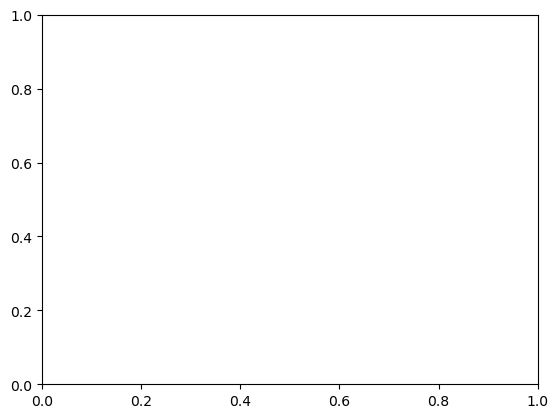

In [49]:
fig,ax = plt.subplots()

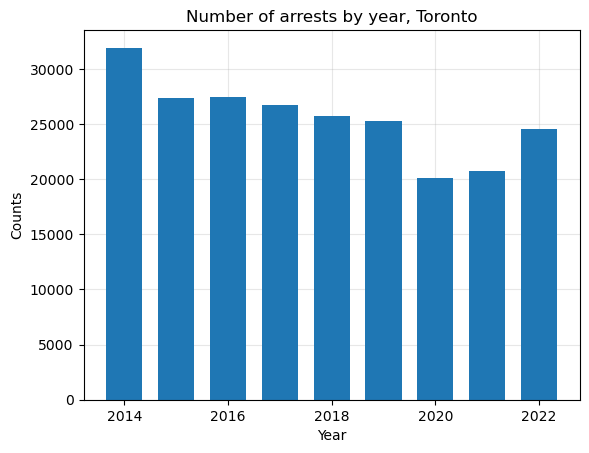

In [50]:
ax.set_axisbelow(True)
ax.grid(alpha=0.3)   

offset=0.7
count = ax.bar(year_sum.index, year_sum['arrest_count'], width=offset)

ax.set_title('Number of arrests by year, Toronto')
ax.set_xlabel('Year')
ax.set_ylabel('Counts')
fig

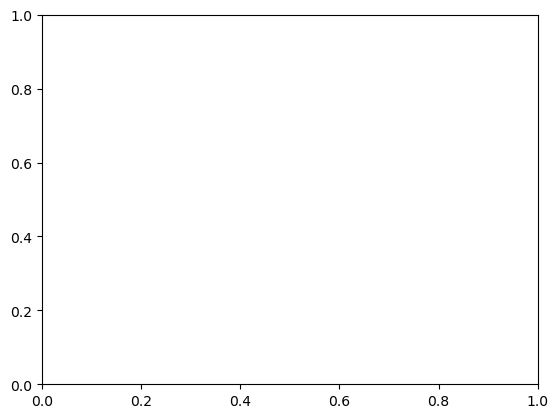

In [104]:
fig,ax = plt.subplots()

In [ ]:

offset = 0.7
adult = ax.bar(year_sum.index, year_sum['arrest_count'], width=offset)
fig